In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import *
import matplotlib.pyplot as plt
import random
import copy

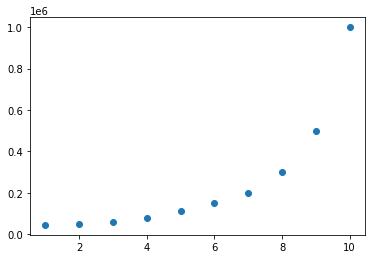

In [12]:
x = np.vstack(np.sort(5 * np.random.rand(40, 1), axis=0))
orig_x = copy.deepcopy(x)
y = 10* np.sin(x)
y += [ yi + 3 * (0.5 - np.random.rand()) for yi in y]
x = np.vstack(np.arange(1,11,1))
y = np.array([[45000],[50000],[60000],[80000],[110000],[150000],[200000],[300000],[500000],[1000000]])
# y = [np.exp(xi) for xi in x]
plt.scatter(x,y)
plt.show()
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

In [3]:
# x

In [13]:
print(1/(x.shape[1]*x.var())) # no sense! normalized input has variance 1!
print(1/(orig_x.shape[1]*orig_x.var()))

1.0
0.6847685141876582


In [19]:
gamma = 'scale'
K = kernel.rbf(x,gamma=gamma, orig_x=None)
K1 = kernel.rbf(x,gamma=gamma, orig_x=orig_x)
box = 1.0
x_init = np.zeros(x.shape)
beta = solveDeflected(x_init, y, K, box, {'eps':1e-2, 'maxiter':3e+3}, True)

Gamma: 1.0
Gamma: 0.6847685141876582
i:    0 - v: 0.000000 - fref:  inf - ||g||: 3.162278 - delta: 0.000000e+00 - ||gdiff||:  inf - eps: 1.000000e-02
i:    1 - v: -0.000093 - fref: 0.000000 - ||g||: 2.935766 - delta: 1.000000e-04 - ||gdiff||: 0.226512 - eps: 1.000000e-02
i:    2 - v: -0.007636 - fref: -0.000093 - ||g||: 2.930979 - delta: 1.000000e-02 - ||gdiff||: 0.004786 - eps: 1.000000e-02
i:    3 - v: -0.014774 - fref: -0.007636 - ||g||: 2.926470 - delta: 1.000000e-02 - ||gdiff||: 0.004509 - eps: 1.000000e-02
i:    4 - v: -0.021799 - fref: -0.014774 - ||g||: 2.922037 - delta: 1.000000e-02 - ||gdiff||: 0.004433 - eps: 1.000000e-02
i:    5 - v: -0.028789 - fref: -0.021799 - ||g||: 2.917627 - delta: 1.000000e-02 - ||gdiff||: 0.004411 - eps: 1.000000e-02
i:    6 - v: -0.035770 - fref: -0.028789 - ||g||: 2.913222 - delta: 1.000000e-02 - ||gdiff||: 0.004405 - eps: 1.000000e-02
i:    7 - v: -0.042747 - fref: -0.035770 - ||g||: 2.908819 - delta: 1.000000e-02 - ||gdiff||: 0.004403 - eps: 1.0

i:   80 - v: -0.550686 - fref: -0.543759 - ||g||: 2.585635 - delta: 1.000000e-02 - ||gdiff||: 0.009882 - eps: 1.000000e-02
i:   81 - v: -0.557618 - fref: -0.550686 - ||g||: 2.586422 - delta: 1.000000e-02 - ||gdiff||: -0.000787 - eps: 1.000000e-02
i:   82 - v: -0.564543 - fref: -0.557618 - ||g||: 2.581843 - delta: 1.000000e-02 - ||gdiff||: 0.004579 - eps: 1.000000e-02
i:   83 - v: -0.571448 - fref: -0.564543 - ||g||: 2.572248 - delta: 1.000000e-02 - ||gdiff||: 0.009595 - eps: 1.000000e-02
i:   84 - v: -0.578388 - fref: -0.571448 - ||g||: 2.567827 - delta: 1.000000e-02 - ||gdiff||: 0.004421 - eps: 1.000000e-02
i:   85 - v: -0.585317 - fref: -0.578388 - ||g||: 2.568241 - delta: 1.000000e-02 - ||gdiff||: -0.000414 - eps: 1.000000e-02
i:   86 - v: -0.592240 - fref: -0.585317 - ||g||: 2.563670 - delta: 1.000000e-02 - ||gdiff||: 0.004570 - eps: 1.000000e-02
i:   87 - v: -0.599152 - fref: -0.592240 - ||g||: 2.554479 - delta: 1.000000e-02 - ||gdiff||: 0.009191 - eps: 1.000000e-02
i:   88 - v: -

i:  152 - v: -1.047205 - fref: -1.040100 - ||g||: 2.265101 - delta: 1.040100e-02 - ||gdiff||: 0.004604 - eps: 1.000000e-02
i:  153 - v: -1.054356 - fref: -1.047205 - ||g||: 2.260470 - delta: 1.047205e-02 - ||gdiff||: 0.004631 - eps: 1.000000e-02
i:  154 - v: -1.061554 - fref: -1.054356 - ||g||: 2.255813 - delta: 1.054356e-02 - ||gdiff||: 0.004657 - eps: 1.000000e-02
i:  155 - v: -1.068799 - fref: -1.061554 - ||g||: 2.251130 - delta: 1.061554e-02 - ||gdiff||: 0.004683 - eps: 1.000000e-02
i:  156 - v: -1.076091 - fref: -1.068799 - ||g||: 2.246421 - delta: 1.068799e-02 - ||gdiff||: 0.004709 - eps: 1.000000e-02
i:  157 - v: -1.083431 - fref: -1.076091 - ||g||: 2.241685 - delta: 1.076091e-02 - ||gdiff||: 0.004736 - eps: 1.000000e-02
i:  158 - v: -1.090819 - fref: -1.083431 - ||g||: 2.236923 - delta: 1.083431e-02 - ||gdiff||: 0.004762 - eps: 1.000000e-02
i:  159 - v: -1.098255 - fref: -1.090819 - ||g||: 2.232135 - delta: 1.090819e-02 - ||gdiff||: 0.004788 - eps: 1.000000e-02
i:  160 - v: -1.

i:  225 - v: -1.707584 - fref: -1.696467 - ||g||: 1.865700 - delta: 1.696467e-02 - ||gdiff||: 0.006045 - eps: 1.000000e-02
i:  226 - v: -1.718762 - fref: -1.707584 - ||g||: 1.859653 - delta: 1.707584e-02 - ||gdiff||: 0.006046 - eps: 1.000000e-02
i:  227 - v: -1.730000 - fref: -1.718762 - ||g||: 1.853606 - delta: 1.718762e-02 - ||gdiff||: 0.006047 - eps: 1.000000e-02
i:  228 - v: -1.741299 - fref: -1.730000 - ||g||: 1.847559 - delta: 1.730000e-02 - ||gdiff||: 0.006047 - eps: 1.000000e-02
i:  229 - v: -1.752658 - fref: -1.741299 - ||g||: 1.841513 - delta: 1.741299e-02 - ||gdiff||: 0.006046 - eps: 1.000000e-02
i:  230 - v: -1.764078 - fref: -1.752658 - ||g||: 1.835469 - delta: 1.752658e-02 - ||gdiff||: 0.006044 - eps: 1.000000e-02
i:  231 - v: -1.775559 - fref: -1.764078 - ||g||: 1.829428 - delta: 1.764078e-02 - ||gdiff||: 0.006041 - eps: 1.000000e-02
i:  232 - v: -1.787100 - fref: -1.775559 - ||g||: 1.823391 - delta: 1.775559e-02 - ||gdiff||: 0.006037 - eps: 1.000000e-02
i:  233 - v: -1.

i:  300 - v: -2.310867 - fref: -2.310559 - ||g||: 1.605044 - delta: 2.310559e-02 - ||gdiff||: -0.000266 - eps: 1.000000e-02
i:  301 - v: -2.311172 - fref: -2.310867 - ||g||: 1.605307 - delta: 2.310867e-02 - ||gdiff||: -0.000263 - eps: 1.000000e-02
i:  302 - v: -2.311472 - fref: -2.311172 - ||g||: 1.605566 - delta: 2.311172e-02 - ||gdiff||: -0.000259 - eps: 1.000000e-02
i:  303 - v: -2.311768 - fref: -2.311472 - ||g||: 1.605821 - delta: 2.311472e-02 - ||gdiff||: -0.000255 - eps: 1.000000e-02
i:  304 - v: -2.312060 - fref: -2.311768 - ||g||: 1.606073 - delta: 2.311768e-02 - ||gdiff||: -0.000252 - eps: 1.000000e-02
i:  305 - v: -2.312348 - fref: -2.312060 - ||g||: 1.606321 - delta: 2.312060e-02 - ||gdiff||: -0.000248 - eps: 1.000000e-02
i:  306 - v: -2.312631 - fref: -2.312348 - ||g||: 1.606566 - delta: 2.312348e-02 - ||gdiff||: -0.000245 - eps: 1.000000e-02
i:  307 - v: -2.312911 - fref: -2.312631 - ||g||: 1.606807 - delta: 2.312631e-02 - ||gdiff||: -0.000241 - eps: 1.000000e-02
i:  308 

i:  369 - v: -2.325117 - fref: -2.324975 - ||g||: 1.615676 - delta: 2.324975e-02 - ||gdiff||: -0.000064 - eps: 1.000000e-02
i:  370 - v: -2.325258 - fref: -2.325117 - ||g||: 1.615737 - delta: 2.325117e-02 - ||gdiff||: -0.000062 - eps: 1.000000e-02
i:  371 - v: -2.325398 - fref: -2.325258 - ||g||: 1.615797 - delta: 2.325258e-02 - ||gdiff||: -0.000060 - eps: 1.000000e-02
i:  372 - v: -2.325537 - fref: -2.325398 - ||g||: 1.615855 - delta: 2.325398e-02 - ||gdiff||: -0.000058 - eps: 1.000000e-02
i:  373 - v: -2.325674 - fref: -2.325537 - ||g||: 1.615910 - delta: 2.325537e-02 - ||gdiff||: -0.000056 - eps: 1.000000e-02
i:  374 - v: -2.325811 - fref: -2.325674 - ||g||: 1.615964 - delta: 2.325674e-02 - ||gdiff||: -0.000054 - eps: 1.000000e-02
i:  375 - v: -2.325946 - fref: -2.325811 - ||g||: 1.616015 - delta: 2.325811e-02 - ||gdiff||: -0.000052 - eps: 1.000000e-02
i:  376 - v: -2.326081 - fref: -2.325946 - ||g||: 1.616065 - delta: 2.325946e-02 - ||gdiff||: -0.000050 - eps: 1.000000e-02
i:  377 

i:  439 - v: -2.332955 - fref: -2.332864 - ||g||: 1.616098 - delta: 2.332864e-02 - ||gdiff||: 0.000036 - eps: 1.000000e-02
i:  440 - v: -2.333046 - fref: -2.332955 - ||g||: 1.616060 - delta: 2.332955e-02 - ||gdiff||: 0.000037 - eps: 1.000000e-02
i:  441 - v: -2.333137 - fref: -2.333046 - ||g||: 1.616022 - delta: 2.333046e-02 - ||gdiff||: 0.000038 - eps: 1.000000e-02
i:  442 - v: -2.333227 - fref: -2.333137 - ||g||: 1.615983 - delta: 2.333137e-02 - ||gdiff||: 0.000039 - eps: 1.000000e-02
i:  443 - v: -2.333316 - fref: -2.333227 - ||g||: 1.615943 - delta: 2.333227e-02 - ||gdiff||: 0.000040 - eps: 1.000000e-02
i:  444 - v: -2.333405 - fref: -2.333316 - ||g||: 1.615902 - delta: 2.333316e-02 - ||gdiff||: 0.000041 - eps: 1.000000e-02
i:  445 - v: -2.333494 - fref: -2.333405 - ||g||: 1.615861 - delta: 2.333405e-02 - ||gdiff||: 0.000042 - eps: 1.000000e-02
i:  446 - v: -2.333583 - fref: -2.333494 - ||g||: 1.615818 - delta: 2.333494e-02 - ||gdiff||: 0.000042 - eps: 1.000000e-02
i:  447 - v: -2.

i:  525 - v: -2.339663 - fref: -2.339595 - ||g||: 1.610598 - delta: 2.339595e-02 - ||gdiff||: 0.000082 - eps: 1.000000e-02
i:  526 - v: -2.339732 - fref: -2.339663 - ||g||: 1.610516 - delta: 2.339663e-02 - ||gdiff||: 0.000082 - eps: 1.000000e-02
i:  527 - v: -2.339800 - fref: -2.339732 - ||g||: 1.610434 - delta: 2.339732e-02 - ||gdiff||: 0.000082 - eps: 1.000000e-02
i:  528 - v: -2.339868 - fref: -2.339800 - ||g||: 1.610351 - delta: 2.339800e-02 - ||gdiff||: 0.000082 - eps: 1.000000e-02
i:  529 - v: -2.339936 - fref: -2.339868 - ||g||: 1.610269 - delta: 2.339868e-02 - ||gdiff||: 0.000083 - eps: 1.000000e-02
i:  530 - v: -2.340004 - fref: -2.339936 - ||g||: 1.610186 - delta: 2.339936e-02 - ||gdiff||: 0.000083 - eps: 1.000000e-02
i:  531 - v: -2.340072 - fref: -2.340004 - ||g||: 1.610102 - delta: 2.340004e-02 - ||gdiff||: 0.000083 - eps: 1.000000e-02
i:  532 - v: -2.340139 - fref: -2.340072 - ||g||: 1.610019 - delta: 2.340072e-02 - ||gdiff||: 0.000083 - eps: 1.000000e-02
i:  533 - v: -2.

i:  597 - v: -2.344251 - fref: -2.344192 - ||g||: 1.604284 - delta: 2.344192e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  598 - v: -2.344311 - fref: -2.344251 - ||g||: 1.604193 - delta: 2.344251e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  599 - v: -2.344371 - fref: -2.344311 - ||g||: 1.604103 - delta: 2.344311e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  600 - v: -2.344430 - fref: -2.344371 - ||g||: 1.604012 - delta: 2.344371e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  601 - v: -2.344490 - fref: -2.344430 - ||g||: 1.603921 - delta: 2.344430e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  602 - v: -2.344549 - fref: -2.344490 - ||g||: 1.603830 - delta: 2.344490e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  603 - v: -2.344608 - fref: -2.344549 - ||g||: 1.603739 - delta: 2.344549e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  604 - v: -2.344667 - fref: -2.344608 - ||g||: 1.603648 - delta: 2.344608e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  605 - v: -2.

i:  672 - v: -2.348507 - fref: -2.348453 - ||g||: 1.597500 - delta: 2.348453e-02 - ||gdiff||: 0.000089 - eps: 1.000000e-02
i:  673 - v: -2.348561 - fref: -2.348507 - ||g||: 1.597411 - delta: 2.348507e-02 - ||gdiff||: 0.000089 - eps: 1.000000e-02
i:  674 - v: -2.348615 - fref: -2.348561 - ||g||: 1.597322 - delta: 2.348561e-02 - ||gdiff||: 0.000089 - eps: 1.000000e-02
i:  675 - v: -2.348669 - fref: -2.348615 - ||g||: 1.597234 - delta: 2.348615e-02 - ||gdiff||: 0.000089 - eps: 1.000000e-02
i:  676 - v: -2.348723 - fref: -2.348669 - ||g||: 1.597145 - delta: 2.348669e-02 - ||gdiff||: 0.000089 - eps: 1.000000e-02
i:  677 - v: -2.348777 - fref: -2.348723 - ||g||: 1.597057 - delta: 2.348723e-02 - ||gdiff||: 0.000089 - eps: 1.000000e-02
i:  678 - v: -2.348831 - fref: -2.348777 - ||g||: 1.596968 - delta: 2.348777e-02 - ||gdiff||: 0.000088 - eps: 1.000000e-02
i:  679 - v: -2.348885 - fref: -2.348831 - ||g||: 1.596880 - delta: 2.348831e-02 - ||gdiff||: 0.000088 - eps: 1.000000e-02
i:  680 - v: -2.

i:  747 - v: -2.352377 - fref: -2.352329 - ||g||: 1.590964 - delta: 2.352329e-02 - ||gdiff||: 0.000090 - eps: 1.000000e-02
i:  748 - v: -2.352427 - fref: -2.352377 - ||g||: 1.590878 - delta: 2.352377e-02 - ||gdiff||: 0.000086 - eps: 1.000000e-02
i:  749 - v: -2.352477 - fref: -2.352427 - ||g||: 1.590794 - delta: 2.352427e-02 - ||gdiff||: 0.000084 - eps: 1.000000e-02
i:  750 - v: -2.352490 - fref: -2.352477 - ||g||: 1.597966 - delta: 2.352477e-02 - ||gdiff||: -0.007172 - eps: 1.000000e-02
i:  751 - v: -2.352548 - fref: -2.352490 - ||g||: 1.590556 - delta: 2.352490e-02 - ||gdiff||: 0.007411 - eps: 1.000000e-02
i:  752 - v: -2.352589 - fref: -2.352548 - ||g||: 1.590450 - delta: 2.352548e-02 - ||gdiff||: 0.000106 - eps: 1.000000e-02
i:  753 - v: -2.352637 - fref: -2.352589 - ||g||: 1.590360 - delta: 2.352589e-02 - ||gdiff||: 0.000091 - eps: 1.000000e-02
i:  754 - v: -2.352686 - fref: -2.352637 - ||g||: 1.590273 - delta: 2.352637e-02 - ||gdiff||: 0.000086 - eps: 1.000000e-02
i:  755 - v: -2

i:  823 - v: -2.354758 - fref: -2.354744 - ||g||: 1.591543 - delta: 1.177372e-02 - ||gdiff||: -0.006512 - eps: 5.000000e-03
i:  824 - v: -2.354775 - fref: -2.354758 - ||g||: 1.584914 - delta: 1.177379e-02 - ||gdiff||: 0.006629 - eps: 5.000000e-03
i:  825 - v: -2.354794 - fref: -2.354775 - ||g||: 1.584862 - delta: 1.177388e-02 - ||gdiff||: 0.000052 - eps: 5.000000e-03
i:  826 - v: -2.354817 - fref: -2.354794 - ||g||: 1.584818 - delta: 1.177397e-02 - ||gdiff||: 0.000044 - eps: 5.000000e-03
i:  827 - v: -2.354841 - fref: -2.354817 - ||g||: 1.584776 - delta: 1.177408e-02 - ||gdiff||: 0.000042 - eps: 5.000000e-03
i:  828 - v: -2.354852 - fref: -2.354841 - ||g||: 1.591261 - delta: 1.177420e-02 - ||gdiff||: -0.006486 - eps: 5.000000e-03
i:  829 - v: -2.354872 - fref: -2.354852 - ||g||: 1.584659 - delta: 1.177426e-02 - ||gdiff||: 0.006603 - eps: 5.000000e-03
i:  830 - v: -2.354891 - fref: -2.354872 - ||g||: 1.584607 - delta: 1.177436e-02 - ||gdiff||: 0.000052 - eps: 5.000000e-03
i:  831 - v: -

i:  904 - v: -2.356271 - fref: -2.356262 - ||g||: 1.587076 - delta: 1.178131e-02 - ||gdiff||: -0.006114 - eps: 5.000000e-03
i:  905 - v: -2.356291 - fref: -2.356271 - ||g||: 1.580852 - delta: 1.178136e-02 - ||gdiff||: 0.006224 - eps: 5.000000e-03
i:  906 - v: -2.356310 - fref: -2.356291 - ||g||: 1.580803 - delta: 1.178146e-02 - ||gdiff||: 0.000049 - eps: 5.000000e-03
i:  907 - v: -2.356332 - fref: -2.356310 - ||g||: 1.580762 - delta: 1.178155e-02 - ||gdiff||: 0.000042 - eps: 5.000000e-03
i:  908 - v: -2.356355 - fref: -2.356332 - ||g||: 1.580722 - delta: 1.178166e-02 - ||gdiff||: 0.000039 - eps: 5.000000e-03
i:  909 - v: -2.356354 - fref: -2.356355 - ||g||: 1.586817 - delta: 1.178177e-02 - ||gdiff||: -0.006095 - eps: 5.000000e-03
i:  910 - v: -2.356384 - fref: -2.356355 - ||g||: 1.580612 - delta: 1.178177e-02 - ||gdiff||: 0.006205 - eps: 5.000000e-03
i:  911 - v: -2.356402 - fref: -2.356384 - ||g||: 1.580563 - delta: 1.178192e-02 - ||gdiff||: 0.000048 - eps: 5.000000e-03
i:  912 - v: -

i:  978 - v: -2.357583 - fref: -2.357565 - ||g||: 1.577382 - delta: 1.178783e-02 - ||gdiff||: 0.000045 - eps: 5.000000e-03
i:  979 - v: -2.357605 - fref: -2.357583 - ||g||: 1.577343 - delta: 1.178792e-02 - ||gdiff||: 0.000038 - eps: 5.000000e-03
i:  980 - v: -2.357620 - fref: -2.357605 - ||g||: 1.583137 - delta: 1.178802e-02 - ||gdiff||: -0.005794 - eps: 5.000000e-03
i:  981 - v: -2.357632 - fref: -2.357620 - ||g||: 1.577238 - delta: 1.178810e-02 - ||gdiff||: 0.005898 - eps: 5.000000e-03
i:  982 - v: -2.357650 - fref: -2.357632 - ||g||: 1.577193 - delta: 1.178816e-02 - ||gdiff||: 0.000045 - eps: 5.000000e-03
i:  983 - v: -2.357671 - fref: -2.357650 - ||g||: 1.577155 - delta: 1.178825e-02 - ||gdiff||: 0.000038 - eps: 5.000000e-03
i:  984 - v: -2.357694 - fref: -2.357671 - ||g||: 1.577119 - delta: 1.178836e-02 - ||gdiff||: 0.000036 - eps: 5.000000e-03
i:  985 - v: -2.357693 - fref: -2.357694 - ||g||: 1.582899 - delta: 1.178847e-02 - ||gdiff||: -0.005780 - eps: 5.000000e-03
i:  986 - v: -

i: 1051 - v: -2.358813 - fref: -2.358796 - ||g||: 1.574117 - delta: 1.179398e-02 - ||gdiff||: 0.000042 - eps: 5.000000e-03
i: 1052 - v: -2.358834 - fref: -2.358813 - ||g||: 1.574082 - delta: 1.179406e-02 - ||gdiff||: 0.000035 - eps: 5.000000e-03
i: 1053 - v: -2.358849 - fref: -2.358834 - ||g||: 1.579612 - delta: 1.179417e-02 - ||gdiff||: -0.005530 - eps: 5.000000e-03
i: 1054 - v: -2.358860 - fref: -2.358849 - ||g||: 1.573984 - delta: 1.179424e-02 - ||gdiff||: 0.005628 - eps: 5.000000e-03
i: 1055 - v: -2.358877 - fref: -2.358860 - ||g||: 1.573942 - delta: 1.179430e-02 - ||gdiff||: 0.000042 - eps: 5.000000e-03
i: 1056 - v: -2.358899 - fref: -2.358877 - ||g||: 1.573907 - delta: 1.179439e-02 - ||gdiff||: 0.000035 - eps: 5.000000e-03
i: 1057 - v: -2.358919 - fref: -2.358899 - ||g||: 1.579422 - delta: 1.179449e-02 - ||gdiff||: -0.005515 - eps: 5.000000e-03
i: 1058 - v: -2.358924 - fref: -2.358919 - ||g||: 1.573810 - delta: 1.179459e-02 - ||gdiff||: 0.005612 - eps: 5.000000e-03
i: 1059 - v: -

i: 1130 - v: -2.360088 - fref: -2.360071 - ||g||: 1.570827 - delta: 1.180036e-02 - ||gdiff||: 0.000039 - eps: 5.000000e-03
i: 1131 - v: -2.360109 - fref: -2.360088 - ||g||: 1.570795 - delta: 1.180044e-02 - ||gdiff||: 0.000032 - eps: 5.000000e-03
i: 1132 - v: -2.360112 - fref: -2.360109 - ||g||: 1.576080 - delta: 1.180055e-02 - ||gdiff||: -0.005284 - eps: 5.000000e-03
i: 1133 - v: -2.360134 - fref: -2.360112 - ||g||: 1.570705 - delta: 1.180056e-02 - ||gdiff||: 0.005375 - eps: 5.000000e-03
i: 1134 - v: -2.360151 - fref: -2.360134 - ||g||: 1.570666 - delta: 1.180067e-02 - ||gdiff||: 0.000039 - eps: 5.000000e-03
i: 1135 - v: -2.360172 - fref: -2.360151 - ||g||: 1.570635 - delta: 1.180075e-02 - ||gdiff||: 0.000032 - eps: 5.000000e-03
i: 1136 - v: -2.360176 - fref: -2.360172 - ||g||: 1.575906 - delta: 1.180086e-02 - ||gdiff||: -0.005272 - eps: 5.000000e-03
i: 1137 - v: -2.360196 - fref: -2.360176 - ||g||: 1.570544 - delta: 1.180088e-02 - ||gdiff||: 0.005362 - eps: 5.000000e-03
i: 1138 - v: -

i: 1205 - v: -2.361246 - fref: -2.361230 - ||g||: 1.567917 - delta: 1.180615e-02 - ||gdiff||: 0.005166 - eps: 5.000000e-03
i: 1206 - v: -2.361262 - fref: -2.361246 - ||g||: 1.567881 - delta: 1.180623e-02 - ||gdiff||: 0.000036 - eps: 5.000000e-03
i: 1207 - v: -2.361283 - fref: -2.361262 - ||g||: 1.567853 - delta: 1.180631e-02 - ||gdiff||: 0.000029 - eps: 5.000000e-03
i: 1208 - v: -2.361290 - fref: -2.361283 - ||g||: 1.572924 - delta: 1.180641e-02 - ||gdiff||: -0.005072 - eps: 5.000000e-03
i: 1209 - v: -2.361307 - fref: -2.361290 - ||g||: 1.567768 - delta: 1.180645e-02 - ||gdiff||: 0.005156 - eps: 5.000000e-03
i: 1210 - v: -2.361323 - fref: -2.361307 - ||g||: 1.567733 - delta: 1.180653e-02 - ||gdiff||: 0.000035 - eps: 5.000000e-03
i: 1211 - v: -2.361344 - fref: -2.361323 - ||g||: 1.567704 - delta: 1.180662e-02 - ||gdiff||: 0.000029 - eps: 5.000000e-03
i: 1212 - v: -2.361350 - fref: -2.361344 - ||g||: 1.572766 - delta: 1.180672e-02 - ||gdiff||: -0.005062 - eps: 5.000000e-03
i: 1213 - v: -

i: 1289 - v: -2.362015 - fref: -2.362011 - ||g||: 1.575017 - delta: 5.905027e-03 - ||gdiff||: -0.009407 - eps: 2.500000e-03
i: 1290 - v: -2.362027 - fref: -2.362015 - ||g||: 1.565544 - delta: 5.905038e-03 - ||gdiff||: 0.009473 - eps: 2.500000e-03
i: 1291 - v: -2.362025 - fref: -2.362027 - ||g||: 1.570359 - delta: 5.905067e-03 - ||gdiff||: -0.004815 - eps: 2.500000e-03
i: 1292 - v: -2.362037 - fref: -2.362027 - ||g||: 1.565491 - delta: 5.905067e-03 - ||gdiff||: 0.004868 - eps: 2.500000e-03
i: 1293 - v: -2.362046 - fref: -2.362037 - ||g||: 1.565474 - delta: 5.905094e-03 - ||gdiff||: 0.000017 - eps: 2.500000e-03
i: 1294 - v: -2.362055 - fref: -2.362046 - ||g||: 1.570291 - delta: 5.905114e-03 - ||gdiff||: -0.004817 - eps: 2.500000e-03
i: 1295 - v: -2.362056 - fref: -2.362055 - ||g||: 1.565435 - delta: 5.905138e-03 - ||gdiff||: 0.004857 - eps: 2.500000e-03
i: 1296 - v: -2.362064 - fref: -2.362056 - ||g||: 1.565419 - delta: 5.905141e-03 - ||gdiff||: 0.000016 - eps: 2.500000e-03
i: 1297 - v: 

i: 1367 - v: -2.362545 - fref: -2.362544 - ||g||: 1.568538 - delta: 5.906361e-03 - ||gdiff||: -0.004640 - eps: 2.500000e-03
i: 1368 - v: -2.362556 - fref: -2.362545 - ||g||: 1.563862 - delta: 5.906361e-03 - ||gdiff||: 0.004675 - eps: 2.500000e-03
i: 1369 - v: -2.362564 - fref: -2.362556 - ||g||: 1.563848 - delta: 5.906389e-03 - ||gdiff||: 0.000014 - eps: 2.500000e-03
i: 1370 - v: -2.362574 - fref: -2.362564 - ||g||: 1.568482 - delta: 5.906410e-03 - ||gdiff||: -0.004634 - eps: 2.500000e-03
i: 1371 - v: -2.362575 - fref: -2.362574 - ||g||: 1.563812 - delta: 5.906436e-03 - ||gdiff||: 0.004670 - eps: 2.500000e-03
i: 1372 - v: -2.362581 - fref: -2.362575 - ||g||: 1.573056 - delta: 5.906436e-03 - ||gdiff||: -0.009244 - eps: 2.500000e-03
i: 1373 - v: -2.362591 - fref: -2.362581 - ||g||: 1.563748 - delta: 5.906451e-03 - ||gdiff||: 0.009307 - eps: 2.500000e-03
i: 1374 - v: -2.362591 - fref: -2.362591 - ||g||: 1.568356 - delta: 5.906476e-03 - ||gdiff||: -0.004608 - eps: 2.500000e-03
i: 1375 - v:

i: 1439 - v: -2.363026 - fref: -2.363018 - ||g||: 1.562402 - delta: 5.907545e-03 - ||gdiff||: 0.000013 - eps: 2.500000e-03
i: 1440 - v: -2.363037 - fref: -2.363026 - ||g||: 1.562392 - delta: 5.907566e-03 - ||gdiff||: 0.000010 - eps: 2.500000e-03
i: 1441 - v: -2.363044 - fref: -2.363037 - ||g||: 1.566865 - delta: 5.907592e-03 - ||gdiff||: -0.004473 - eps: 2.500000e-03
i: 1442 - v: -2.363040 - fref: -2.363044 - ||g||: 1.571493 - delta: 5.907609e-03 - ||gdiff||: -0.004628 - eps: 2.500000e-03
i: 1443 - v: -2.363054 - fref: -2.363044 - ||g||: 1.562309 - delta: 5.907609e-03 - ||gdiff||: 0.009185 - eps: 2.500000e-03
i: 1444 - v: -2.363062 - fref: -2.363054 - ||g||: 1.566752 - delta: 5.907634e-03 - ||gdiff||: -0.004443 - eps: 2.500000e-03
i: 1445 - v: -2.363063 - fref: -2.363062 - ||g||: 1.562260 - delta: 5.907654e-03 - ||gdiff||: 0.004492 - eps: 2.500000e-03
i: 1446 - v: -2.363071 - fref: -2.363063 - ||g||: 1.562246 - delta: 5.907658e-03 - ||gdiff||: 0.000014 - eps: 2.500000e-03
i: 1447 - v: 

i: 1514 - v: -2.363509 - fref: -2.363512 - ||g||: 1.565247 - delta: 5.908779e-03 - ||gdiff||: -0.004311 - eps: 2.500000e-03
i: 1515 - v: -2.363523 - fref: -2.363512 - ||g||: 1.560905 - delta: 5.908779e-03 - ||gdiff||: 0.004342 - eps: 2.500000e-03
i: 1516 - v: -2.363531 - fref: -2.363523 - ||g||: 1.560894 - delta: 5.908808e-03 - ||gdiff||: 0.000012 - eps: 2.500000e-03
i: 1517 - v: -2.363533 - fref: -2.363531 - ||g||: 1.574189 - delta: 5.908829e-03 - ||gdiff||: -0.013295 - eps: 2.500000e-03
i: 1518 - v: -2.363539 - fref: -2.363533 - ||g||: 1.560828 - delta: 5.613387e-03 - ||gdiff||: 0.013361 - eps: 1.250000e-03
i: 1519 - v: -2.363546 - fref: -2.363539 - ||g||: 1.560807 - delta: 5.332718e-03 - ||gdiff||: 0.000021 - eps: 1.250000e-03
i: 1520 - v: -2.363553 - fref: -2.363546 - ||g||: 1.565095 - delta: 5.066082e-03 - ||gdiff||: -0.004288 - eps: 1.250000e-03
i: 1521 - v: -2.363554 - fref: -2.363553 - ||g||: 1.560778 - delta: 4.812778e-03 - ||gdiff||: 0.004317 - eps: 1.250000e-03
i: 1522 - v: 

i: 1589 - v: -2.363783 - fref: -2.363782 - ||g||: 1.564362 - delta: 2.954728e-03 - ||gdiff||: -0.004226 - eps: 1.250000e-03
i: 1590 - v: -2.363788 - fref: -2.363783 - ||g||: 1.560122 - delta: 2.954729e-03 - ||gdiff||: 0.004241 - eps: 1.250000e-03
i: 1591 - v: -2.363792 - fref: -2.363788 - ||g||: 1.560116 - delta: 2.954735e-03 - ||gdiff||: 0.000006 - eps: 1.250000e-03
i: 1592 - v: -2.363795 - fref: -2.363792 - ||g||: 1.573263 - delta: 2.954740e-03 - ||gdiff||: -0.013147 - eps: 1.250000e-03
i: 1593 - v: -2.363796 - fref: -2.363795 - ||g||: 1.560082 - delta: 2.954744e-03 - ||gdiff||: 0.013180 - eps: 1.250000e-03
i: 1594 - v: -2.363799 - fref: -2.363796 - ||g||: 1.560071 - delta: 2.954745e-03 - ||gdiff||: 0.000011 - eps: 1.250000e-03
i: 1595 - v: -2.363805 - fref: -2.363799 - ||g||: 1.560065 - delta: 2.954749e-03 - ||gdiff||: 0.000006 - eps: 1.250000e-03
i: 1596 - v: -2.363802 - fref: -2.363805 - ||g||: 1.564283 - delta: 2.954756e-03 - ||gdiff||: -0.004218 - eps: 1.250000e-03
i: 1597 - v: 

i: 1662 - v: -2.364017 - fref: -2.364013 - ||g||: 1.559452 - delta: 2.955016e-03 - ||gdiff||: 0.000005 - eps: 1.250000e-03
i: 1663 - v: -2.364018 - fref: -2.364017 - ||g||: 1.572473 - delta: 2.955021e-03 - ||gdiff||: -0.013021 - eps: 1.250000e-03
i: 1664 - v: -2.364021 - fref: -2.364018 - ||g||: 1.559419 - delta: 2.955023e-03 - ||gdiff||: 0.013054 - eps: 1.250000e-03
i: 1665 - v: -2.364024 - fref: -2.364021 - ||g||: 1.559408 - delta: 2.955026e-03 - ||gdiff||: 0.000011 - eps: 1.250000e-03
i: 1666 - v: -2.364026 - fref: -2.364024 - ||g||: 1.563550 - delta: 2.955030e-03 - ||gdiff||: -0.004142 - eps: 1.250000e-03
i: 1667 - v: -2.364029 - fref: -2.364026 - ||g||: 1.559391 - delta: 2.955033e-03 - ||gdiff||: 0.004158 - eps: 1.250000e-03
i: 1668 - v: -2.364033 - fref: -2.364029 - ||g||: 1.559386 - delta: 2.955036e-03 - ||gdiff||: 0.000005 - eps: 1.250000e-03
i: 1669 - v: -2.364039 - fref: -2.364033 - ||g||: 1.559382 - delta: 2.955042e-03 - ||gdiff||: 0.000004 - eps: 1.250000e-03
i: 1670 - v: -

i: 1739 - v: -2.364257 - fref: -2.364252 - ||g||: 1.558742 - delta: 2.955315e-03 - ||gdiff||: 0.000004 - eps: 1.250000e-03
i: 1740 - v: -2.364256 - fref: -2.364257 - ||g||: 1.562818 - delta: 2.955322e-03 - ||gdiff||: -0.004076 - eps: 1.250000e-03
i: 1741 - v: -2.364263 - fref: -2.364257 - ||g||: 1.558729 - delta: 2.955322e-03 - ||gdiff||: 0.004089 - eps: 1.250000e-03
i: 1742 - v: -2.364265 - fref: -2.364263 - ||g||: 1.567555 - delta: 2.955329e-03 - ||gdiff||: -0.008827 - eps: 1.250000e-03
i: 1743 - v: -2.364265 - fref: -2.364265 - ||g||: 1.562774 - delta: 2.955331e-03 - ||gdiff||: 0.004782 - eps: 1.250000e-03
i: 1744 - v: -2.364270 - fref: -2.364265 - ||g||: 1.558686 - delta: 2.955332e-03 - ||gdiff||: 0.004088 - eps: 1.250000e-03
i: 1745 - v: -2.364274 - fref: -2.364270 - ||g||: 1.558679 - delta: 2.955338e-03 - ||gdiff||: 0.000007 - eps: 1.250000e-03
i: 1746 - v: -2.364277 - fref: -2.364274 - ||g||: 1.562744 - delta: 2.955343e-03 - ||gdiff||: -0.004065 - eps: 1.250000e-03
i: 1747 - v: 

i: 1814 - v: -2.364485 - fref: -2.364482 - ||g||: 1.558069 - delta: 2.286977e-03 - ||gdiff||: 0.000005 - eps: 6.250000e-04
i: 1815 - v: -2.364489 - fref: -2.364485 - ||g||: 1.558067 - delta: 2.172628e-03 - ||gdiff||: 0.000003 - eps: 6.250000e-04
i: 1816 - v: -2.364490 - fref: -2.364489 - ||g||: 1.562069 - delta: 2.063997e-03 - ||gdiff||: -0.004002 - eps: 6.250000e-04
i: 1817 - v: -2.364493 - fref: -2.364490 - ||g||: 1.558058 - delta: 1.960797e-03 - ||gdiff||: 0.004011 - eps: 6.250000e-04
i: 1818 - v: -2.364496 - fref: -2.364493 - ||g||: 1.558055 - delta: 1.862757e-03 - ||gdiff||: 0.000003 - eps: 6.250000e-04
i: 1819 - v: -2.364498 - fref: -2.364496 - ||g||: 1.562056 - delta: 1.769619e-03 - ||gdiff||: -0.004001 - eps: 6.250000e-04
i: 1820 - v: -2.364499 - fref: -2.364498 - ||g||: 1.558047 - delta: 1.681138e-03 - ||gdiff||: 0.004009 - eps: 6.250000e-04
i: 1821 - v: -2.364499 - fref: -2.364499 - ||g||: 1.566821 - delta: 1.597081e-03 - ||gdiff||: -0.008774 - eps: 6.250000e-04
i: 1822 - v: 

i: 1887 - v: -2.364602 - fref: -2.364600 - ||g||: 1.557751 - delta: 1.477875e-03 - ||gdiff||: 0.000002 - eps: 6.250000e-04
i: 1888 - v: -2.364605 - fref: -2.364602 - ||g||: 1.557749 - delta: 1.477877e-03 - ||gdiff||: 0.000002 - eps: 6.250000e-04
i: 1889 - v: -2.364604 - fref: -2.364605 - ||g||: 1.570454 - delta: 1.477878e-03 - ||gdiff||: -0.012704 - eps: 6.250000e-04
i: 1890 - v: -2.364607 - fref: -2.364605 - ||g||: 1.557734 - delta: 1.477878e-03 - ||gdiff||: 0.012720 - eps: 6.250000e-04
i: 1891 - v: -2.364608 - fref: -2.364607 - ||g||: 1.561696 - delta: 1.477879e-03 - ||gdiff||: -0.003962 - eps: 6.250000e-04
i: 1892 - v: -2.364609 - fref: -2.364608 - ||g||: 1.557723 - delta: 1.477880e-03 - ||gdiff||: 0.003973 - eps: 6.250000e-04
i: 1893 - v: -2.364611 - fref: -2.364609 - ||g||: 1.557720 - delta: 1.477880e-03 - ||gdiff||: 0.000003 - eps: 6.250000e-04
i: 1894 - v: -2.364613 - fref: -2.364611 - ||g||: 1.557718 - delta: 1.477882e-03 - ||gdiff||: 0.000002 - eps: 6.250000e-04
i: 1895 - v: -

i: 1961 - v: -2.364715 - fref: -2.364714 - ||g||: 1.557424 - delta: 1.477946e-03 - ||gdiff||: 0.003941 - eps: 6.250000e-04
i: 1962 - v: -2.364717 - fref: -2.364715 - ||g||: 1.557422 - delta: 1.477947e-03 - ||gdiff||: 0.000002 - eps: 6.250000e-04
i: 1963 - v: -2.364719 - fref: -2.364717 - ||g||: 1.557421 - delta: 1.477948e-03 - ||gdiff||: 0.000002 - eps: 6.250000e-04
i: 1964 - v: -2.364719 - fref: -2.364719 - ||g||: 1.561356 - delta: 1.477950e-03 - ||gdiff||: -0.003936 - eps: 6.250000e-04
i: 1965 - v: -2.364720 - fref: -2.364719 - ||g||: 1.566142 - delta: 1.477950e-03 - ||gdiff||: -0.004786 - eps: 6.250000e-04
i: 1966 - v: -2.364724 - fref: -2.364720 - ||g||: 1.557403 - delta: 1.477950e-03 - ||gdiff||: 0.008739 - eps: 6.250000e-04
i: 1967 - v: -2.364723 - fref: -2.364724 - ||g||: 1.561332 - delta: 1.477952e-03 - ||gdiff||: -0.003929 - eps: 6.250000e-04
i: 1968 - v: -2.364726 - fref: -2.364724 - ||g||: 1.557393 - delta: 1.477952e-03 - ||gdiff||: 0.003939 - eps: 6.250000e-04
i: 1969 - v: 

i: 2043 - v: -2.364840 - fref: -2.364838 - ||g||: 1.557069 - delta: 1.478024e-03 - ||gdiff||: 0.003905 - eps: 6.250000e-04
i: 2044 - v: -2.364842 - fref: -2.364840 - ||g||: 1.557067 - delta: 1.478025e-03 - ||gdiff||: 0.000002 - eps: 6.250000e-04
i: 2045 - v: -2.364843 - fref: -2.364842 - ||g||: 1.560964 - delta: 1.478026e-03 - ||gdiff||: -0.003897 - eps: 6.250000e-04
i: 2046 - v: -2.364845 - fref: -2.364843 - ||g||: 1.557061 - delta: 1.478027e-03 - ||gdiff||: 0.003903 - eps: 6.250000e-04
i: 2047 - v: -2.364847 - fref: -2.364845 - ||g||: 1.557058 - delta: 1.478028e-03 - ||gdiff||: 0.000002 - eps: 6.250000e-04
i: 2048 - v: -2.364849 - fref: -2.364847 - ||g||: 1.569633 - delta: 1.478029e-03 - ||gdiff||: -0.012575 - eps: 6.250000e-04
i: 2049 - v: -2.364848 - fref: -2.364849 - ||g||: 1.557043 - delta: 1.478030e-03 - ||gdiff||: 0.012591 - eps: 6.250000e-04
i: 2050 - v: -2.364850 - fref: -2.364849 - ||g||: 1.557038 - delta: 1.478030e-03 - ||gdiff||: 0.000005 - eps: 6.250000e-04
i: 2051 - v: -

i: 2126 - v: -2.364946 - fref: -2.364946 - ||g||: 1.560642 - delta: 7.390456e-04 - ||gdiff||: -0.003865 - eps: 3.125000e-04
i: 2127 - v: -2.364947 - fref: -2.364946 - ||g||: 1.556772 - delta: 7.390457e-04 - ||gdiff||: 0.003870 - eps: 3.125000e-04
i: 2128 - v: -2.364948 - fref: -2.364947 - ||g||: 1.556771 - delta: 7.390459e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2129 - v: -2.364949 - fref: -2.364948 - ||g||: 1.560637 - delta: 7.390462e-04 - ||gdiff||: -0.003866 - eps: 3.125000e-04
i: 2130 - v: -2.364949 - fref: -2.364949 - ||g||: 1.556768 - delta: 7.390466e-04 - ||gdiff||: 0.003869 - eps: 3.125000e-04
i: 2131 - v: -2.364950 - fref: -2.364949 - ||g||: 1.556767 - delta: 7.390466e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2132 - v: -2.364952 - fref: -2.364950 - ||g||: 1.556766 - delta: 7.390470e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2133 - v: -2.364951 - fref: -2.364952 - ||g||: 1.569290 - delta: 7.390474e-04 - ||gdiff||: -0.012523 - eps: 3.125000e-04
i: 2134 - v: 

i: 2203 - v: -2.365005 - fref: -2.365004 - ||g||: 1.556613 - delta: 7.390636e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2204 - v: -2.365005 - fref: -2.365005 - ||g||: 1.560463 - delta: 7.390640e-04 - ||gdiff||: -0.003850 - eps: 3.125000e-04
i: 2205 - v: -2.365006 - fref: -2.365005 - ||g||: 1.556610 - delta: 7.390641e-04 - ||gdiff||: 0.003853 - eps: 3.125000e-04
i: 2206 - v: -2.365007 - fref: -2.365006 - ||g||: 1.556609 - delta: 7.390645e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2207 - v: -2.365008 - fref: -2.365007 - ||g||: 1.569103 - delta: 7.390648e-04 - ||gdiff||: -0.012494 - eps: 3.125000e-04
i: 2208 - v: -2.365008 - fref: -2.365008 - ||g||: 1.556602 - delta: 7.390649e-04 - ||gdiff||: 0.012502 - eps: 3.125000e-04
i: 2209 - v: -2.365009 - fref: -2.365008 - ||g||: 1.556599 - delta: 7.390651e-04 - ||gdiff||: 0.000002 - eps: 3.125000e-04
i: 2210 - v: -2.365010 - fref: -2.365009 - ||g||: 1.560447 - delta: 7.390654e-04 - ||gdiff||: -0.003848 - eps: 3.125000e-04
i: 2211 - v: 

i: 2277 - v: -2.365061 - fref: -2.365060 - ||g||: 1.556457 - delta: 7.390811e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2278 - v: -2.365061 - fref: -2.365061 - ||g||: 1.560291 - delta: 7.390815e-04 - ||gdiff||: -0.003834 - eps: 3.125000e-04
i: 2279 - v: -2.365062 - fref: -2.365061 - ||g||: 1.556454 - delta: 7.390816e-04 - ||gdiff||: 0.003837 - eps: 3.125000e-04
i: 2280 - v: -2.365063 - fref: -2.365062 - ||g||: 1.556453 - delta: 7.390819e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2281 - v: -2.365064 - fref: -2.365063 - ||g||: 1.568919 - delta: 7.390822e-04 - ||gdiff||: -0.012466 - eps: 3.125000e-04
i: 2282 - v: -2.365064 - fref: -2.365064 - ||g||: 1.556445 - delta: 7.390824e-04 - ||gdiff||: 0.012473 - eps: 3.125000e-04
i: 2283 - v: -2.365065 - fref: -2.365064 - ||g||: 1.556443 - delta: 7.390825e-04 - ||gdiff||: 0.000002 - eps: 3.125000e-04
i: 2284 - v: -2.365066 - fref: -2.365065 - ||g||: 1.560274 - delta: 7.390827e-04 - ||gdiff||: -0.003831 - eps: 3.125000e-04
i: 2285 - v: 

i: 2350 - v: -2.365115 - fref: -2.365114 - ||g||: 1.556303 - delta: 7.390981e-04 - ||gdiff||: 0.003821 - eps: 3.125000e-04
i: 2351 - v: -2.365116 - fref: -2.365115 - ||g||: 1.556302 - delta: 7.390985e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2352 - v: -2.365117 - fref: -2.365116 - ||g||: 1.560120 - delta: 7.390988e-04 - ||gdiff||: -0.003817 - eps: 3.125000e-04
i: 2353 - v: -2.365118 - fref: -2.365117 - ||g||: 1.556299 - delta: 7.390990e-04 - ||gdiff||: 0.003820 - eps: 3.125000e-04
i: 2354 - v: -2.365118 - fref: -2.365118 - ||g||: 1.564939 - delta: 7.390993e-04 - ||gdiff||: -0.008640 - eps: 3.125000e-04
i: 2355 - v: -2.365119 - fref: -2.365118 - ||g||: 1.560110 - delta: 7.390995e-04 - ||gdiff||: 0.004830 - eps: 3.125000e-04
i: 2356 - v: -2.365119 - fref: -2.365119 - ||g||: 1.556289 - delta: 7.390997e-04 - ||gdiff||: 0.003820 - eps: 3.125000e-04
i: 2357 - v: -2.365120 - fref: -2.365119 - ||g||: 1.556288 - delta: 7.390998e-04 - ||gdiff||: 0.000001 - eps: 3.125000e-04
i: 2358 - v: -

i: 2432 - v: -2.365156 - fref: -2.365156 - ||g||: 1.556193 - delta: 3.695556e-04 - ||gdiff||: 0.000001 - eps: 1.562500e-04
i: 2433 - v: -2.365156 - fref: -2.365156 - ||g||: 1.559999 - delta: 3.695557e-04 - ||gdiff||: -0.003806 - eps: 1.562500e-04
i: 2434 - v: -2.365157 - fref: -2.365156 - ||g||: 1.556191 - delta: 3.695557e-04 - ||gdiff||: 0.003808 - eps: 1.562500e-04
i: 2435 - v: -2.365157 - fref: -2.365157 - ||g||: 1.556190 - delta: 3.695558e-04 - ||gdiff||: 0.000001 - eps: 1.562500e-04
i: 2436 - v: -2.365158 - fref: -2.365157 - ||g||: 1.559997 - delta: 3.695558e-04 - ||gdiff||: -0.003806 - eps: 1.562500e-04
i: 2437 - v: -2.365158 - fref: -2.365158 - ||g||: 1.556189 - delta: 3.695559e-04 - ||gdiff||: 0.003808 - eps: 1.562500e-04
i: 2438 - v: -2.365158 - fref: -2.365158 - ||g||: 1.564822 - delta: 3.695559e-04 - ||gdiff||: -0.008633 - eps: 1.562500e-04
i: 2439 - v: -2.365159 - fref: -2.365158 - ||g||: 1.559992 - delta: 3.695560e-04 - ||gdiff||: 0.004830 - eps: 1.562500e-04
i: 2440 - v: 

i: 2522 - v: -2.365190 - fref: -2.365189 - ||g||: 1.559896 - delta: 3.695609e-04 - ||gdiff||: -0.003796 - eps: 1.562500e-04
i: 2523 - v: -2.365190 - fref: -2.365190 - ||g||: 1.556098 - delta: 3.695609e-04 - ||gdiff||: 0.003798 - eps: 1.562500e-04
i: 2524 - v: -2.365190 - fref: -2.365190 - ||g||: 1.556097 - delta: 3.695609e-04 - ||gdiff||: 0.000001 - eps: 1.562500e-04
i: 2525 - v: -2.365191 - fref: -2.365190 - ||g||: 1.556097 - delta: 3.695610e-04 - ||gdiff||: 0.000000 - eps: 1.562500e-04
i: 2526 - v: -2.365191 - fref: -2.365191 - ||g||: 1.559894 - delta: 3.695611e-04 - ||gdiff||: -0.003797 - eps: 1.562500e-04
i: 2527 - v: -2.365192 - fref: -2.365191 - ||g||: 1.564721 - delta: 3.695611e-04 - ||gdiff||: -0.004828 - eps: 1.562500e-04
i: 2528 - v: -2.365192 - fref: -2.365192 - ||g||: 1.556093 - delta: 3.695612e-04 - ||gdiff||: 0.008629 - eps: 1.562500e-04
i: 2529 - v: -2.365192 - fref: -2.365192 - ||g||: 1.559888 - delta: 3.695613e-04 - ||gdiff||: -0.003795 - eps: 1.562500e-04
i: 2530 - v:

i: 2603 - v: -2.365220 - fref: -2.365220 - ||g||: 1.559804 - delta: 3.695656e-04 - ||gdiff||: -0.003787 - eps: 1.562500e-04
i: 2604 - v: -2.365220 - fref: -2.365220 - ||g||: 1.556014 - delta: 3.695656e-04 - ||gdiff||: 0.003790 - eps: 1.562500e-04
i: 2605 - v: -2.365221 - fref: -2.365220 - ||g||: 1.556014 - delta: 3.695657e-04 - ||gdiff||: 0.000001 - eps: 1.562500e-04
i: 2606 - v: -2.365221 - fref: -2.365221 - ||g||: 1.559801 - delta: 3.695658e-04 - ||gdiff||: -0.003788 - eps: 1.562500e-04
i: 2607 - v: -2.365222 - fref: -2.365221 - ||g||: 1.556012 - delta: 3.695658e-04 - ||gdiff||: 0.003789 - eps: 1.562500e-04
i: 2608 - v: -2.365222 - fref: -2.365222 - ||g||: 1.564631 - delta: 3.695659e-04 - ||gdiff||: -0.008619 - eps: 1.562500e-04
i: 2609 - v: -2.365222 - fref: -2.365222 - ||g||: 1.559796 - delta: 3.695659e-04 - ||gdiff||: 0.004835 - eps: 1.562500e-04
i: 2610 - v: -2.365222 - fref: -2.365222 - ||g||: 1.556007 - delta: 3.695660e-04 - ||gdiff||: 0.003789 - eps: 1.562500e-04
i: 2611 - v: 

i: 2685 - v: -2.365247 - fref: -2.365247 - ||g||: 1.555943 - delta: 1.847849e-04 - ||gdiff||: 0.012377 - eps: 7.812500e-05
i: 2686 - v: -2.365247 - fref: -2.365247 - ||g||: 1.559723 - delta: 1.847849e-04 - ||gdiff||: -0.003780 - eps: 7.812500e-05
i: 2687 - v: -2.365247 - fref: -2.365247 - ||g||: 1.555942 - delta: 1.847849e-04 - ||gdiff||: 0.003781 - eps: 7.812500e-05
i: 2688 - v: -2.365247 - fref: -2.365247 - ||g||: 1.555941 - delta: 1.847849e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2689 - v: -2.365248 - fref: -2.365247 - ||g||: 1.555941 - delta: 1.847849e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2690 - v: -2.365248 - fref: -2.365248 - ||g||: 1.559722 - delta: 1.847850e-04 - ||gdiff||: -0.003781 - eps: 7.812500e-05
i: 2691 - v: -2.365248 - fref: -2.365248 - ||g||: 1.564555 - delta: 1.847850e-04 - ||gdiff||: -0.004833 - eps: 7.812500e-05
i: 2692 - v: -2.365248 - fref: -2.365248 - ||g||: 1.555939 - delta: 1.847850e-04 - ||gdiff||: 0.008616 - eps: 7.812500e-05
i: 2693 - v: 

i: 2759 - v: -2.365261 - fref: -2.365260 - ||g||: 1.555905 - delta: 1.847860e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2760 - v: -2.365261 - fref: -2.365261 - ||g||: 1.559681 - delta: 1.847860e-04 - ||gdiff||: -0.003776 - eps: 7.812500e-05
i: 2761 - v: -2.365261 - fref: -2.365261 - ||g||: 1.555904 - delta: 1.847860e-04 - ||gdiff||: 0.003777 - eps: 7.812500e-05
i: 2762 - v: -2.365261 - fref: -2.365261 - ||g||: 1.555904 - delta: 1.847860e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2763 - v: -2.365262 - fref: -2.365261 - ||g||: 1.555903 - delta: 1.847860e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2764 - v: -2.365261 - fref: -2.365262 - ||g||: 1.559680 - delta: 1.847861e-04 - ||gdiff||: -0.003777 - eps: 7.812500e-05
i: 2765 - v: -2.365262 - fref: -2.365262 - ||g||: 1.564514 - delta: 1.847861e-04 - ||gdiff||: -0.004834 - eps: 7.812500e-05
i: 2766 - v: -2.365262 - fref: -2.365262 - ||g||: 1.559678 - delta: 1.847861e-04 - ||gdiff||: 0.004837 - eps: 7.812500e-05
i: 2767 - v: 

i: 2835 - v: -2.365275 - fref: -2.365275 - ||g||: 1.555866 - delta: 1.847871e-04 - ||gdiff||: 0.003773 - eps: 7.812500e-05
i: 2836 - v: -2.365275 - fref: -2.365275 - ||g||: 1.555866 - delta: 1.847871e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2837 - v: -2.365275 - fref: -2.365275 - ||g||: 1.568226 - delta: 1.847871e-04 - ||gdiff||: -0.012361 - eps: 7.812500e-05
i: 2838 - v: -2.365275 - fref: -2.365275 - ||g||: 1.555864 - delta: 1.847871e-04 - ||gdiff||: 0.012363 - eps: 7.812500e-05
i: 2839 - v: -2.365276 - fref: -2.365275 - ||g||: 1.555863 - delta: 1.847871e-04 - ||gdiff||: 0.000001 - eps: 7.812500e-05
i: 2840 - v: -2.365276 - fref: -2.365276 - ||g||: 1.559635 - delta: 1.847871e-04 - ||gdiff||: -0.003772 - eps: 7.812500e-05
i: 2841 - v: -2.365276 - fref: -2.365276 - ||g||: 1.555862 - delta: 1.847872e-04 - ||gdiff||: 0.003773 - eps: 7.812500e-05
i: 2842 - v: -2.365276 - fref: -2.365276 - ||g||: 1.555862 - delta: 1.847872e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2843 - v: -

i: 2921 - v: -2.365291 - fref: -2.365291 - ||g||: 1.555821 - delta: 1.847883e-04 - ||gdiff||: 0.003769 - eps: 7.812500e-05
i: 2922 - v: -2.365291 - fref: -2.365291 - ||g||: 1.555821 - delta: 1.847883e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2923 - v: -2.365291 - fref: -2.365291 - ||g||: 1.555821 - delta: 1.847884e-04 - ||gdiff||: 0.000000 - eps: 7.812500e-05
i: 2924 - v: -2.365291 - fref: -2.365291 - ||g||: 1.559589 - delta: 1.847884e-04 - ||gdiff||: -0.003768 - eps: 7.812500e-05
i: 2925 - v: -2.365292 - fref: -2.365291 - ||g||: 1.555820 - delta: 1.847884e-04 - ||gdiff||: 0.003769 - eps: 7.812500e-05
i: 2926 - v: -2.365292 - fref: -2.365292 - ||g||: 1.564425 - delta: 1.847884e-04 - ||gdiff||: -0.008605 - eps: 7.812500e-05
i: 2927 - v: -2.365292 - fref: -2.365292 - ||g||: 1.559586 - delta: 1.847884e-04 - ||gdiff||: 0.004839 - eps: 7.812500e-05
i: 2928 - v: -2.365292 - fref: -2.365292 - ||g||: 1.555817 - delta: 1.847884e-04 - ||gdiff||: 0.003769 - eps: 7.812500e-05
i: 2929 - v: -

In [20]:
# beta

In [20]:
mask = np.logical_or(beta > 1e-6, beta < -1e-6)
support = np.vstack(np.vstack(np.arange(len(beta)))[mask])
suppvect = np.vstack(x[mask])
y_sv = np.vstack(y[mask])
betasv = np.vstack(beta[mask])

b = 0
for i in range(betasv.size):
    b += y_sv[i]
    for j in range(beta.size):
        b -= beta[j] * K[j, support[i]]
b /= betasv.size # (why ?) (computing average bias ??)
b -= 0.1 # -eps
# W = np.dot(np.transpose(betasv), suppvect)
#print(f"W : {W} - b: {b}")

In [22]:
# mask

In [23]:
# betasv

b: [0.0511951]
Gamma: scale - Box: 1.0
PREDICTION (INPUT = 5) [[136136.1038224]]
LOSS: [2.39776578]


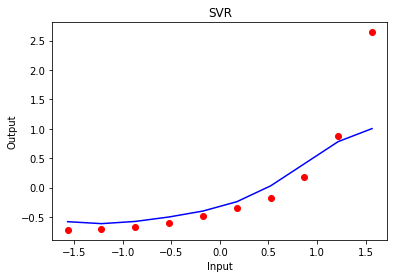

In [21]:
W = np.dot(np.transpose(betasv), suppvect)
# print(f"W : {W}")
print(f"b: {b}")
print(f"Gamma: {gamma} - Box: {box}")
to_predict = 5
sc_X_val = sc_X.transform(np.array([[to_predict]]))
# Second predict the value
scaled_y_pred = predict_rbf(b, betasv, sc_X_val, suppvect, gamma=(None if gamma == 'scale' else gamma))
# Third - since this is scaled - we have to inverse transform
y_pred = sc_y.inverse_transform(scaled_y_pred) 
print(f'PREDICTION (INPUT = {to_predict})', y_pred)

plt.scatter(x, y , color="red")
pred = [float(predict_rbf(b, betasv, x[i], suppvect, gamma=(None if gamma == 'scale' else gamma))) for i in range(x.size)]
print("LOSS:",eps_ins_loss(y,pred))
# print(pred)
plt.plot(x, pred, color="blue")
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()

b: [0.01158103]
Gamma: scale - Box: 1.0
PREDICTION (INPUT = 5) [122574.52250599]


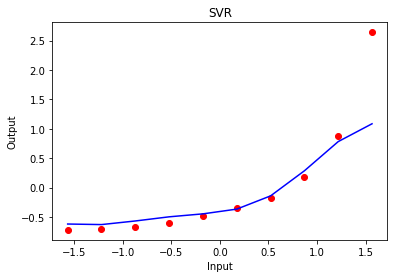

In [22]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',gamma=gamma)
Y = np.hstack(y)
X = x
regressor.fit(X, Y)
y_scal = sc_X.transform(np.array([[to_predict]]))
y_pred = regressor.predict(y_scal)
y_pred = sc_y.inverse_transform(y_pred)
print(f"b: {regressor.intercept_}")
print(f"Gamma: {regressor.get_params()['gamma']} - Box: {regressor.get_params()['C']}")
print(f'PREDICTION (INPUT = {to_predict})',y_pred)
# X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
# X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('SVR')
plt.xlabel('Input')
plt.ylabel('Output')
plt.show()


In [26]:
regressor.support_vectors_

array([[-1.68180887],
       [-1.4946299 ],
       [-1.06617067],
       [-0.8071588 ],
       [-0.00845246],
       [ 0.00755589],
       [ 0.20083274],
       [ 1.1077662 ],
       [ 1.57706435],
       [ 1.7285735 ]])

In [27]:
regressor.support_

array([ 1,  3,  7, 10, 20, 21, 24, 33, 37, 39])

In [28]:
regressor.epsilon

0.1

In [29]:
regressor.intercept_

array([-0.37864353])

In [30]:
params = regressor.get_params()
params['gamma']

'scale'

In [18]:
params['C']

1.0